In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

%matplotlib inline

In [2]:
# import Fashion Box Subscription Upgrade

fashion = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashion.csv")

In [5]:
fashion.head() #examine


,age,income,months_subbed,upgrade
0,22,108.99,35,1
1,32,58.63,46,1
2,38,62.89,35,1
3,14,74.39,19,1
4,33,60.11,8,1


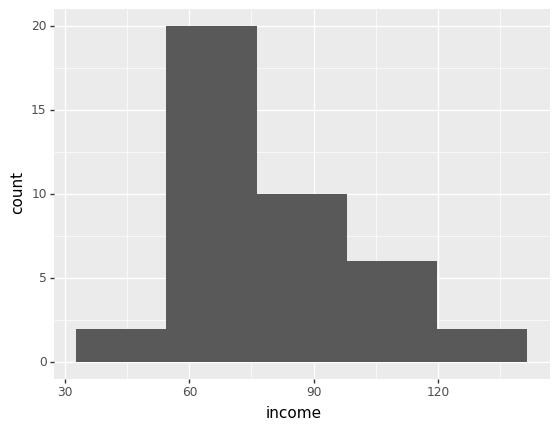

<ggplot: (317474545)>

In [6]:
# plot

(ggplot(fashion, aes("income")) + geom_histogram())

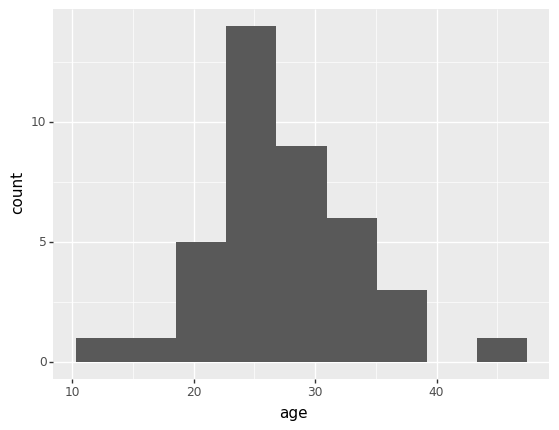

<ggplot: (317510524)>

In [7]:
# plot

(ggplot(fashion, aes("age")) + geom_histogram())

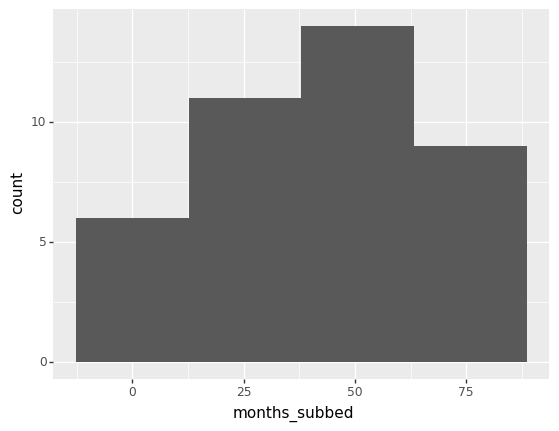

<ggplot: (319686873)>

In [8]:
# plot

(ggplot(fashion, aes("months_subbed")) + geom_histogram())


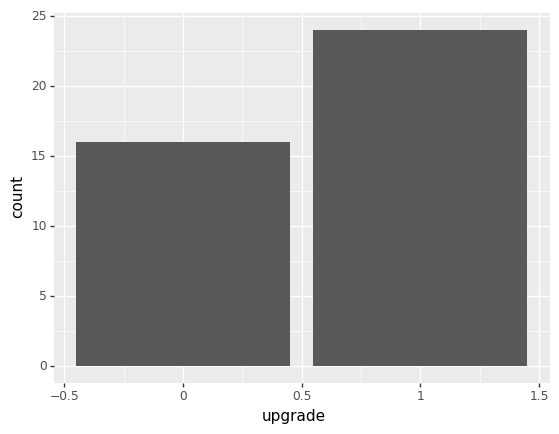

<ggplot: (317502368)>

In [9]:
# plot
(ggplot(fashion, aes("upgrade")) + geom_bar())

# Inference

In [12]:
predictors = ["age", "income", "months_subbed"]
Y = fashion["upgrade"]
X = fashion[predictors]

X = sm.add_constant(X)


,const,age,income,months_subbed
0,1.0,22,108.99,35
1,1.0,32,58.63,46
2,1.0,38,62.89,35
3,1.0,14,74.39,19
4,1.0,33,60.11,8
5,1.0,34,60.63,51
6,1.0,26,57.85,35
7,1.0,26,54.96,7
8,1.0,26,69.52,64
9,1.0,24,70.06,27


In [13]:
model = sm.Logit(Y,X)

In [14]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.597171
         Iterations 6


In [15]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                upgrade   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                  0.1127
Time:                        16:48:48   Log-Likelihood:                -23.887
converged:                       True   LL-Null:                       -26.920
Covariance Type:            nonrobust   LLR p-value:                    0.1084
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9777      2.781     -1.071      0.284      -8.427       2.472
age               0.1445      0.073      1.977      0.048       0.001       0.288
income           -0.0066      0.017     -0.397      0.691      -0.039       0.026
months_subbed     0.0015      0.016      0.089      0.929      -0.030       0.033
=================================================================================
"""

In [16]:
np.exp(output.params)

const            0.050909
age              1.155514
income           0.993470
months_subbed    1.001460
dtype: float64

In [17]:
liz = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")

In [20]:
liz.head()
liz.columns

Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'disc_number', 'duration_ms', 'explicit',
       'track_href', 'is_local', 'track_name', 'track_preview_url',
       'track_number', 'type', 'track_uri', 'external_urls.spotify',
       'album_name', 'key_name', 'mode_name', 'key_mode'],
      dtype='object')

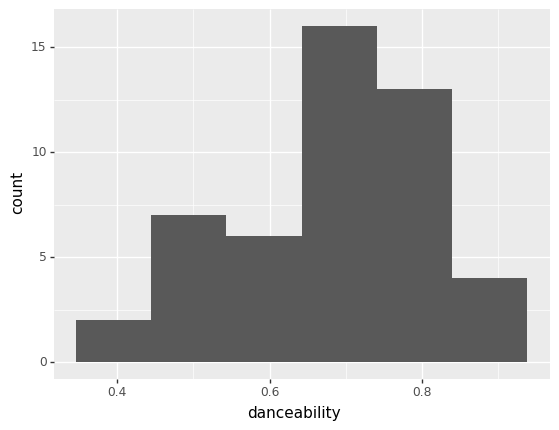

<ggplot: (319786566)>

In [21]:
(ggplot(liz, aes("danceability")) + geom_histogram())

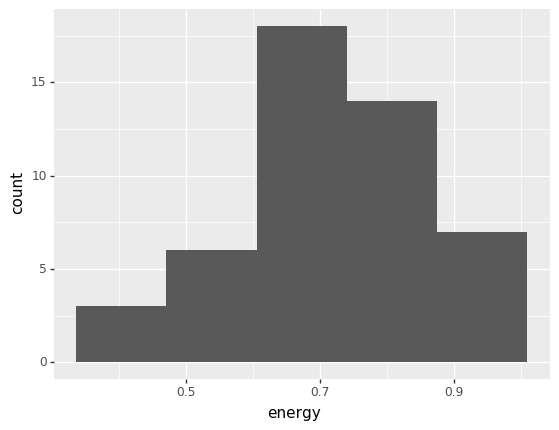

<ggplot: (320053252)>

In [22]:
(ggplot(liz, aes("energy")) + geom_histogram())

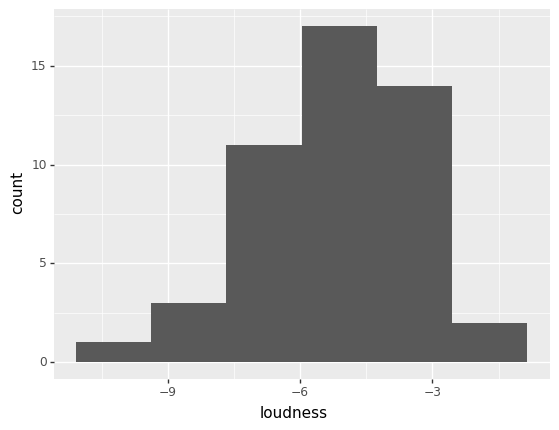

<ggplot: (320030446)>

In [23]:
(ggplot(liz, aes("loudness")) + geom_histogram())

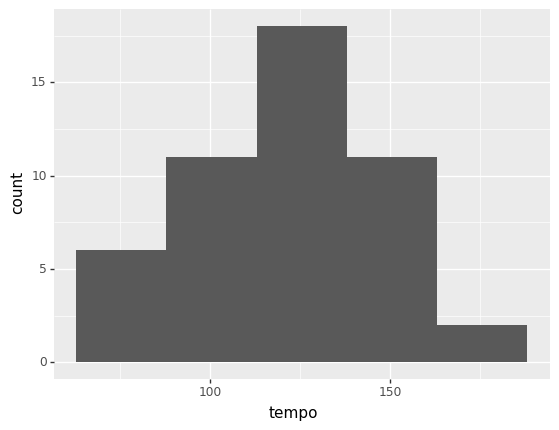

<ggplot: (320010665)>

In [24]:
(ggplot(liz, aes("tempo")) + geom_histogram())

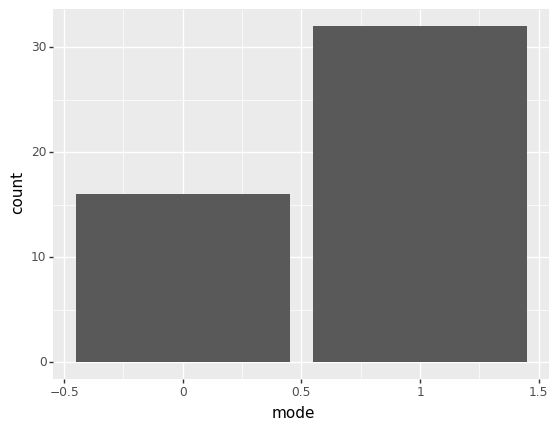

<ggplot: (317510506)>

In [25]:
(ggplot(liz, aes("mode")) + geom_bar())

# can we predict major or minor?

In [28]:
Y = liz["mode"]
colsToKeep = liz.columns.isin(["danceability", "energy", "loudness", "tempo"])
X = liz.loc[:,colsToKeep]
X = sm.add_constant(X)

In [29]:
model = sm.Logit(Y,X)

In [30]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.587473
         Iterations 5


In [31]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mode   No. Observations:                   48
Model:                          Logit   Df Residuals:                       43
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Mar 2020   Pseudo R-squ.:                 0.07705
Time:                        17:00:13   Log-Likelihood:                -28.199
converged:                       True   LL-Null:                       -30.553
Covariance Type:            nonrobust   LLR p-value:                    0.3186
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2185      3.419      0.064      0.949      -6.482       6.919
danceability    -1.2793      2.668     -0.479      0.632      -6.509       3.951
energy          -0.8886      3.060     -0.290      0.771      -6.886       5.108
loudness         0.1769      0.216      0.819      0.413      -0.247       0.600
tempo            0.0248      0.014      1.803      0.071      -0.002       0.052
================================================================================
"""

In [32]:
np.exp(output.params)

const           1.244267
danceability    0.278244
energy          0.411233
loudness        1.193518
tempo           1.025085
dtype: float64

# Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

1. Model Create
2. Fit
3. Predict

In [ ]:
# data
fashionBIG = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionBIG.csv")
fashionBIG.head()

In [ ]:
predictors = ["age", "income", "months_subbed"]

X_train, X_test, y_train, y_test = train_test_split(fashionBIG[predictors], fashionBIG["upgrade"], test_size=0.2)
X_train.head()

zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [ ]:
myLogit = LogisticRegression() #create

In [ ]:
myLogit.fit(Xz_train,y_train) #fit

In [ ]:
predictedVals = myLogit.predict(Xz_test) #predict

In [ ]:
accuracy_score(y_test,predictedVals)

In [ ]:
confusion_matrix(y_test,predictedVals)

## Predict new Data

In [ ]:
fashionNEW = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionNEW.csv")

Xnew = fashionNEW.iloc[:,0:3]
Xnewz = zscore.transform(Xnew)

In [ ]:
Ypred = myLogit.predict(Xnewz)

In [ ]:
accuracy_score(fashionNEW["upgrade"], Ypred)

In [ ]:
confusion_matrix(fashionNEW["upgrade"], Ypred)